In [33]:
# Importar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('dataset_partida.csv')

### 1. Estudio de la estructura del dataset

In [34]:
# Número de variables y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x1         400 non-null    float64
 1   x2         400 non-null    float64
 2   resultado  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [35]:
# Variable objetivo y naturaleza del problema

## Aquí podemos ver que hay dos campos (x1, x2) los cuales contienen un número decimal (float) 
## y a partir de ambos números deberemos de crear un resultado

# Es un problema de clasificación supervisada binaria

### 2. Justificación del enfoque elegido

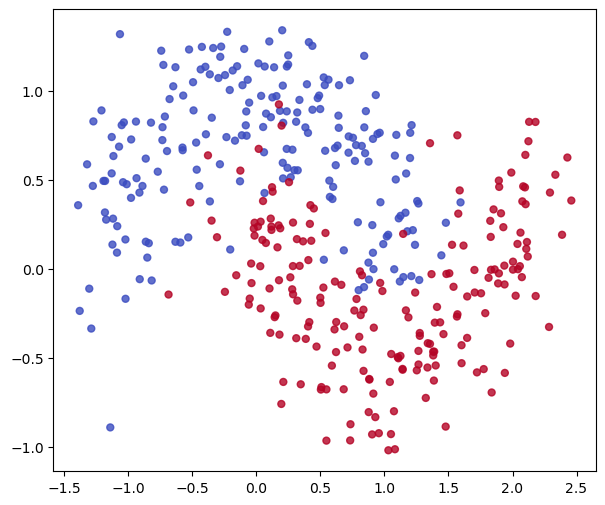

In [36]:
plt.figure(figsize=(7, 6))
plt.scatter(df["x1"], df["x2"], c=df["resultado"], cmap="coolwarm", s=25, alpha=0.8)
plt.show()

In [37]:
## Viendo esta gráfica, podemos llegar a la conclusión de que no se puede usar un modelo de regresion lineal, ya que no es posible separarlo con una línea.
## Uso LogisticRegression como un comienzo, porque es simple de implementar. Y luego pruebo con Uso SVM con kernel RBF a ver si sube el accuracy.
## 

### 3. Entrenamiento y evaluación de los modelos seleccionados

In [38]:
# Asignando X, Y
X = df.drop(columns=["resultado"])
y = df["resultado"]

print(X.shape)
print(y.shape)

(400, 2)
(400,)


#### Probando con regresión logistica

In [39]:
# Utilizando el modelo de regresión logistica
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Entrenando el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Aplicando regresión logistica al modelo que ya hemos entrenado
logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Mostrando resultado
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["X1", "X2"]))

[[47  3]
 [ 4 46]]
              precision    recall  f1-score   support

          X1       0.92      0.94      0.93        50
          X2       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



<Figure size 800x600 with 0 Axes>

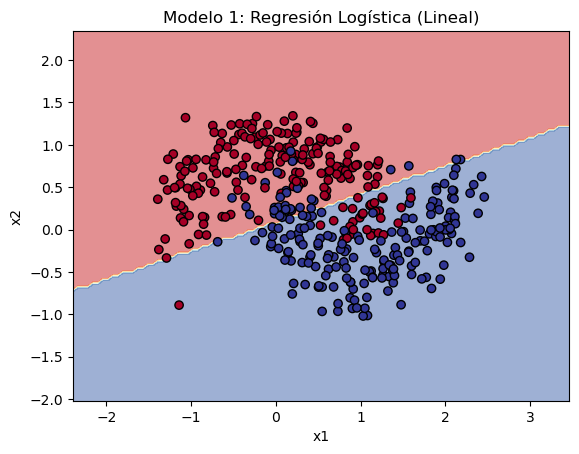

In [40]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(8, 6))

# Dibujar la frontera de decisión
disp = DecisionBoundaryDisplay.from_estimator(
    logreg,  # Asegúrate de usar 'logreg' que es como lo llamaste en tu celda 80
    X, 
    response_method="predict",
    cmap=plt.cm.RdYlBu,
    alpha=0.5
)

# Dibujar los puntos reales
disp.ax_.scatter(X['x1'], X['x2'], c=y.values.ravel(), edgecolors='k', cmap=plt.cm.RdYlBu)

plt.title("Modelo 1: Regresión Logística (Lineal)")
plt.show()

#### Probando con SVM kernel RBF

In [41]:
## Importando librerias
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Realizando el entrenamiento con SVM con kernel RBF
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_rbf = SVC(kernel="rbf", C=0.1, gamma=0.001, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

pred_rbf = svm_rbf.predict(X_test_scaled)

# Mostrando los resultados
print("\n=== SVM RBF ===")
print("Accuracy:", accuracy_score(y_test, pred_rbf))
print(confusion_matrix(y_test, pred_rbf))
print(classification_report(y_test, pred_rbf))



=== SVM RBF ===
Accuracy: 0.93
[[47  3]
 [ 4 46]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



/home/ciabd10/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


<Figure size 800x600 with 0 Axes>

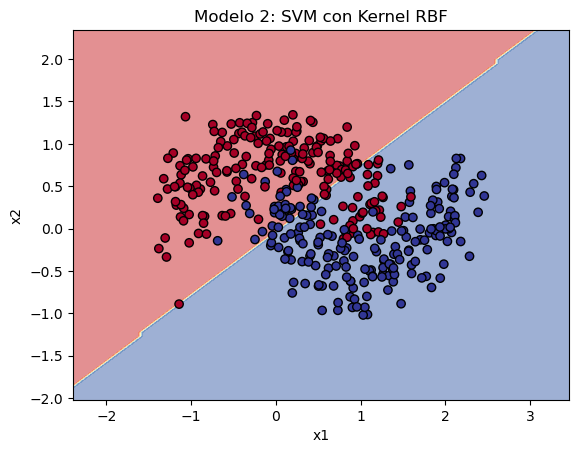

In [42]:
# Mostrando el resultado del SVM con kernel RBF
plt.figure(figsize=(8, 6))

disp = DecisionBoundaryDisplay.from_estimator(
    svm_rbf,
    X, 
    response_method="predict",
    cmap=plt.cm.RdYlBu,
    alpha=0.5
)

disp.ax_.scatter(X['x1'], X['x2'], c=y.values.ravel(), edgecolors='k', cmap=plt.cm.RdYlBu)

plt.title("Modelo 2: SVM con Kernel RBF")
plt.show()

#### Probando con polinomio de distintos grados

0.9225


<Figure size 800x600 with 0 Axes>

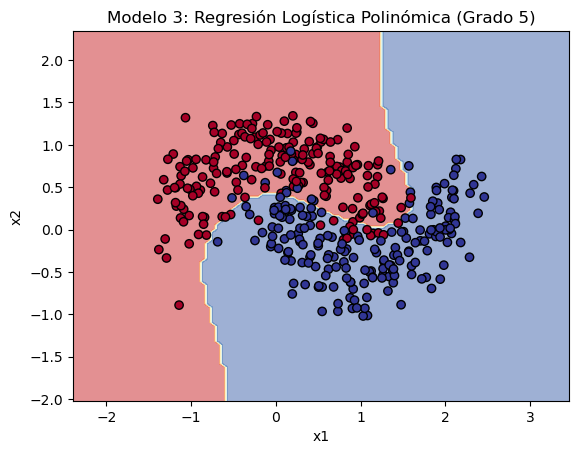

In [43]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

# Grado del polinomio
grado = 5

plt.figure(figsize=(8, 6))

# 1. Creamos un Pipeline para la visualización
modelo_poly = make_pipeline(
    PolynomialFeatures(degree=grado),
    StandardScaler(),  # Se mete el escalado
    LogisticRegression()
)

# Entrenamos este modelo
modelo_poly.fit(X, y.values.ravel())

# Mostrando la precisión
y_pred = modelo_poly.predict(X)
acc = accuracy_score(y.values.ravel(), y_pred)
print(acc)

# Representando el modelo polinómico
disp = DecisionBoundaryDisplay.from_estimator(
    modelo_poly, 
    X, 
    response_method="predict",
    cmap=plt.cm.RdYlBu,
    alpha=0.5
)

disp.ax_.scatter(X['x1'], X['x2'], c=y.values.ravel(), edgecolors='k', cmap=plt.cm.RdYlBu)

plt.title(f"Modelo 3: Regresión Logística Polinómica (Grado {grado})")
plt.show()

### Valoración final

Viendo la dispersión, se observa que las clases no son separables con una recta, así que un enfoque lineal no es adecuado.​

Por ello, tiene sentido usar modelos, como una SVM con kernel RBF o una regresión logística.

En las pruebas realizadas, la SVM RBF obtiene una accuracy aproximada de 0.93, mientras que la regresión logística con polinomios llega hasta 0.92, cometiendo pocos errores en la matriz de confusión.​ Aunque lo malo de SVM con kernel RBF, dependiendo de los hiperparametros se puede sobreajustar

Como opción final me quedo con la regresión logística polinómica por su mejor rendimiento en este dataset y porque sigue siendo un modelo relativamente simple de entrenar y mantener.​


La limitación principal de LogisticRegression es que, sin transformar las variables, solo aprende una frontera lineal; por eso aquí es clave el uso de características polinómicas (y el escalado).​ Y encima el dataset es pequeño.

Para mejorar, se puede ajustar hiperparámetros (por ejemplo CC y el grado del polinomio), usar validación cruzada y, si es posible, disponer de más datos para generalizar mejor.